In [1]:
import copy
import itertools

import matplotlib.pyplot as plt
import numpy as np
import plotly.offline as pty
import plotly.graph_objs as ptygo
import plotly.grid_objs as ptygr
import plotly.tools as ptytools
import scipy.stats as st

import FilterPointCloud
import ProcessPlanePointCloud
import PLYObject

pty.init_notebook_mode(connected=True)

In [2]:
pcDataNear01 = ProcessPlanePointCloud.main('RealSense-D415-Data-Near-01/Laser/', {
    2.5: [
        'x>-1.1279',
        'x<1.1447',
        'y<0.58',
    ]
})

Processing folder RealSense-D415-Plane-0.5m-1280x720-6-Laser
Filters: []
n = 4
e = [0.0012727427970869217, 0.0011975697795350208, 0.0012006033992579541, 0.001187259202670105]
d = [3599376.619869466, 3673032.532764292, 3674125.8279104563, 3689355.221976535]

Processing folder RealSense-D415-Plane-0.5m-640x480-6-Laser
Filters: []
n = 5
e = [0.0009796295997246296, 0.0009964414797781294, 0.0009896044594917145, 0.000992709157150387, 0.000984501569741538]
d = [1620227.25906803, 1625838.291950744, 1625583.7795994848, 1623391.8546215848, 1626158.7745715436]

Processing folder RealSense-D415-Plane-1.0m-1280x720-6-Laser
Filters: []
n = 5
e = [0.004171541094055333, 0.003960588507395946, 0.003925371093276734, 0.003885050631728354, 0.00388607937705456]
d = [871253.1860691312, 869398.9870511761, 866467.4519292725, 866021.1612864289, 870413.9586669243]

Processing folder RealSense-D415-Plane-1.0m-640x480-6-Laser
Filters: []
n = 5
e = [0.0022913486439486543, 0.0022044379996637564, 0.002246465024864696

In [3]:
pcDataNear02 = ProcessPlanePointCloud.main('RealSense-D415-Data-Near-02/Laser', {
    2.0: [
        'x>-0.925',
        'x<1.022',
    ],
    2.5: [
        'x>-0.695',
        'x<1.26',
        'y>-0.88',
    ],
})

Processing folder RealSense-D415-Plane-0.5m-1280x720-6-Laser
Filters: []
n = 10
e = [0.0013949282846405099, 0.0014255667818444935, 0.0014325423673505389, 0.0014249098368084682, 0.0014376534404692038, 0.0014199174900371028, 0.0014235299280021107, 0.001417973097314473, 0.0014206602575285254, 0.0014177412227963555]
d = [3356355.6655129916, 3405366.25660316, 3382880.30562966, 3396178.8363245046, 3390913.001814651, 3393509.275090769, 3405477.7964412873, 3386404.7929691626, 3390380.075048211, 3395075.5521768196]

Processing folder RealSense-D415-Plane-0.5m-424x240-6-Laser
Filters: []
n = 10
e = [0.0011942177632391338, 0.0011666440278936096, 0.001156463514746301, 0.0011361367754140004, 0.0011375162556094601, 0.0011248299692693765, 0.0011350272066243557, 0.0011445644429309858, 0.0011324191197371733, 0.0011203389229926092]
d = [382867.725027019, 383337.8710543845, 383505.1233345482, 383339.0971988286, 382607.2879539325, 383328.18363252695, 383189.1568733283, 383657.0026623556, 383155.5853491262

In [4]:
pcDataFar02 = ProcessPlanePointCloud.main('RealSense-D415-Data-Far-02/Laser', {
    5.0: [
        'x>-0.43816',
        'x<0.44257',
        'y>-0.93533',
        'y<1.0309',
    ],
    7.5: [
        'x>-0.39332',
        'x<0.28466',
        'y>-0.7516',
        'y<1.0035',
    ],
    10.0: [
        'x>-0.58987',
        'x<0.3114',
        'y>-0.5276',
        'y<1.1418',
    ],
})

Processing folder RealSense-D415-Plane-10.0m-1280x720-6-Laser
Filters: [X>-0.5899, X<0.3114, Y>-0.5276, Y<1.1418]
n = 10
e = [0.23085673668358095, 0.20773310225815017, 0.21995225724947326, 0.21882493376603168, 0.22423504693837507, 0.21776177122041032, 0.21766392070986773, 0.189272171924069, 0.22051027367300352, 0.20870435542321403]
d = [2574.9706761325633, 1302.3537319416814, 1542.5684670398618, 2222.333886172374, 1447.611947764259, 1806.0420548583854, 2161.4176650214463, 1370.3442802029606, 1855.0195499492738, 1495.8772539125337]

Processing folder RealSense-D415-Plane-10.0m-640x480-6-Laser
Filters: [X>-0.5899, X<0.3114, Y>-0.5276, Y<1.1418]
n = 10
e = [0.21842009281463615, 0.21460895608160727, 0.22504545382008834, 0.20884917347945073, 0.2272889116059218, 0.2237315627088229, 0.209099134498549, 0.1964707693518561, 0.2238082025891828, 0.22635442920421858]
d = [1487.5888838538642, 1071.1899689248478, 890.1821471084014, 938.6666275895955, 895.9296967896676, 1026.0848551466156, 986.8520133

In [5]:
def ptyColorMap(names):
    ptyColors = itertools.cycle(reversed(ptytools.DEFAULT_PLOTLY_COLORS))

    return dict(zip(names, ptyColors))

In [6]:
def createGraphObjectsFromPlaneData(data):
    goData = {}
    layoutData = {}
    
    colorMap = ptyColorMap(data.keys())
    
    measurandMap = {
        #'planeFitError': {
        #    'xaxis': {
        #        'title': 'Distance [m]',
        #    },
        #    'yaxis': {
        #        'title': 'Error [mm]',
        #    },
        #    'title': 'Plane Fit Error',
        #},
        'planeFitErrorStd': {
            'xaxis': {
                'title': 'Distance [m]',
            },
            'yaxis': {
                'title': 'Error STD [mm]',
                'range': [0, 7.3],
            },
            'title': 'Plane Fit Error Standard Deviation',
            'factor': 1000,
        },
        'pointDensity': {
            'xaxis': {
                'title': 'Distance [m]',
            },
            'yaxis': {
                'title': 'Point Density [p / m²]',
                'tickformat': ',d',
                'hoverformat': ',.2f',
            },
            'title': 'Point Density',
            'factor': 1,
        },
    }
    
    resolutions = [*map(lambda res: 'x'.join([*map(str, res)]), sorted(map(lambda res: [*map(int, res.split('x'))], data.keys()), reverse=True))]
    
    for res in resolutions:
        showlegend = True
        
        for measurand in data[res]:
            if measurand not in measurandMap:
                continue
            
            distances = sorted(data[res][measurand].keys())
            errors = [np.array(data[res][measurand][dist]) * measurandMap[measurand]['factor'] for dist in distances]
            
            go = ptygo.Scatter(
                x=distances,
                y=[errorMeasurand.mean() for errorMeasurand in errors],
                error_y=dict(
                    type='data',
                    visible=True,
                    symmetric=True,
                    array=np.abs(np.array([st.t.interval(0.95, errorMeasurand.shape[0]-1, loc=0, scale=st.sem(errorMeasurand)) for errorMeasurand in errors])[:, 0]),
                    color=colorMap[res],
                ),
                name=res,
                legendgroup=res,
                showlegend=showlegend,
                line=dict(
                    color=colorMap[res],
                ),
            )
            
            if measurand not in goData:
                goData[measurand] = []
            
            goData[measurand].append(go)
            showlegend = False
            
            layoutData[measurand] = copy.deepcopy(measurandMap[measurand])
            
            if 'range' in layoutData[measurand]['yaxis']:
                layoutData[measurand]['yaxis']['range'][0] = min(0, *[data.min() for data in errors])
                layoutData[measurand]['yaxis']['range'][1] = max(73, *[data.max() for data in errors])
    
    return goData, layoutData

In [7]:
def plotPlaneData(data, title):
    go, lay = createGraphObjectsFromPlaneData(data)
    goKeys = [*go.keys()]
    rows = int(np.floor(np.sqrt(len(go))))
    cols = int(np.ceil(np.sqrt(len(go))))
    
    titles = tuple(lay[goKey]['title'] for goKey in goKeys)
    
    fig = ptytools.make_subplots(rows=rows, cols=cols, subplot_titles=titles, print_grid=False)
    fig['layout']['title'] = title
    fig['layout']['separators'] = ',.'
    
    for v in range(rows):
        for u in range(cols):
            i = v * rows + u
            
            if i >= len(go):
                break
            
            for t in go[goKeys[i]]:
                fig.append_trace(t, v + 1, u + 1)
            
            layout = lay[goKeys[i]]
            
            if 'xaxis' in layout:
                fig['layout']['xaxis{:d}'.format((v+1)*(rows-1)+u+1)].update(layout['xaxis'])
            
            if 'yaxis' in layout:
                fig['layout']['yaxis{:d}'.format((v+1)*(rows-1)+u+1)].update(layout['yaxis'])
    
    
    pty.iplot(fig)

In [8]:
plotPlaneData(pcDataNear01, 'Plan Fitting Near - Dataset 01')

In [9]:
plotPlaneData(pcDataNear02, 'Plan Fitting Near - Dataset 02')

Large divergence for different resolutions results in different aspect ratio. Apparently, the device just defines a region of interest for out of the full resolution depth map. This results in lesser artifacts in the corners.

In [10]:
plotPlaneData(pcDataFar02, 'Plan Fitting Far - Dataset 01')

The error values and plots tend to show an improvement for increasing distance again. This is against intuitive belief. Further digging in the data reveal that the error in this distances is so large, the plane is fittet completely wrong. One could account for that by increasing the area of the target plane in the image. Due to limitations in our experiment setup, we couldn't find a large enough plane which still fitted indoors to cover the whole field of view at a distance of 10 meters.

In [11]:
def plotGarbageFiltering(ply):
    vertices = ply.getVertices().T
    
    fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(20, 15))
    fig.suptitle('Garbage Point Filtering', fontsize=16)

    for axis in ax.ravel():
        axis.grid(True)
        axis.set_ylabel('Z values')

    data0 = np.unique(np.sort(vertices[:, 2]))
    data1 = np.diff(data0)

    ax[0, 0].set_title('Without Garbage Filtering')
    ax[0, 0].plot(data0)
    ax[0, 0].plot(data1, '--')

    fVertices = FilterPointCloud.filterGarbageOld1(vertices)
    data0 = np.unique(np.sort(fVertices[:, 2]))
    data1 = np.diff(data0)

    ax[0, 1].set_title('With Garbage Filtering v1')
    ax[0, 1].plot(data0)
    ax[0, 1].plot(data1, '--')

    fVertices = FilterPointCloud.filterGarbageOld2(vertices)
    data0 = np.unique(np.sort(fVertices[:, 2]))
    data1 = np.diff(data0)

    ax[1, 0].set_title('With Garbage Filtering v2')
    ax[1, 0].plot(data0)
    ax[1, 0].plot(data1, '--')

    fVertices = FilterPointCloud.filterGarbage(vertices)
    data0 = np.unique(np.sort(fVertices[:, 2]))
    data1 = np.diff(data0)

    ax[1, 1].set_title('With Garbage Filtering v3')
    ax[1, 1].plot(data0)
    ax[1, 1].plot(data1, '--')

    plt.show()

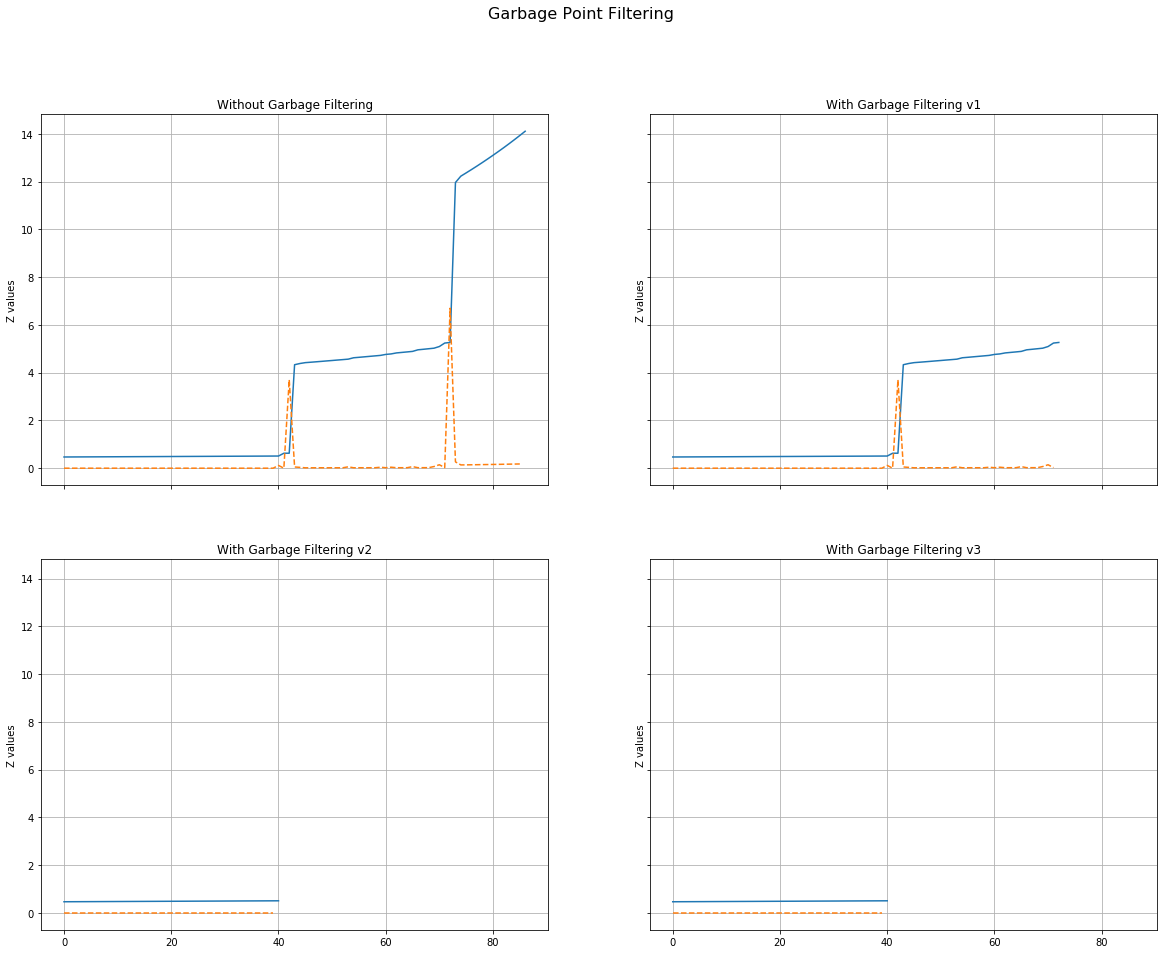

In [12]:
plotGarbageFiltering(PLYObject.PLYObject(r'RealSense-D415-Data-Near-01\Laser\RealSense-D415-Plane-0.5m-640x480-6-Laser\3.pointcloud.ply'))

In [ ]:
filt = FilterPointCloud.parseFilters([
    'x>-0.7188',
    'x<1.26',
    'y>-0.88',
])
ply = PLYObject.PLYObject(r'RealSense-D415-Data-Near-02\Laser\RealSense-D415-Plane-2.5m-424x240-6-Laser\1.pointcloud.ply')
fply = FilterPointCloud.filterPLYObject(ply, filt)

vert = ply.getVertices()
fvert = fply.getVertices()

data = [
    ptygo.Scatter3d(
        x=fvert[0],
        y=fvert[1],
        z=fvert[2],
        mode='markers',
        marker=dict(
            size=1,
            opacity=0.7,
        ),
    )
]
pty.iplot(data)

In [ ]:
data = [
    ptygo.Scatter3d(
        x=vert[0],
        y=vert[1],
        z=vert[2],
        mode='markers',
        marker=dict(
            size=1,
            opacity=0.7,
        ),
    )
]
pty.iplot(data)